# Solution to Exercise Fourier Transform 3
---

### Exercise 1
---

Consider the eletrical circuit (a so called band-pass-filter of 2nd order) as shown below

<img src="band_pass_circuit.png" height="100" width="400"/>


(a) Derive the differential equation in the time domain
$$
\left(\frac{L}{R}\frac{\mathrm{d}^2}{\mathrm{d}t^2} + \frac{\mathrm{d}}{\mathrm{d}t} + \frac{1}{RC}\right)U_o(t) = \dot{U}_i(t)
$$
Hint: Use $I = \dot{Q} = \frac{\mathrm{d} Q}{\mathrm{d}t}$.

(b) Determine $H(\omega)$ and plot $|H(\omega)$|.  
- Use $R=1, C=10^{-2}, L=10^{-3}$.
- Use a logarithmic scale for $\omega$.
- Explain, why this circuit is called a band-pass-filter.


(c) Determine and plot the output $U_o(t)$ due to the input signal
$$
U_i(t) = U \cdot \cos(\omega t),\qquad U = 10, \omega=10^3
$$

###  Solution 1
---

(a) We have
$$
\begin{align}
U_i &=& U_C + U_L + U_o \\
&=& \frac{Q}{C} + L\dot{I} + U_o \\
\Rightarrow \quad \dot{U}_i &=& \frac{I}{C} + L\ddot{I} + \dot{U}_o \\
&=& \frac{1}{RC}U_o + \frac{L}{R}\ddot{U}_o + \dot{U}_o \\
\end{align} 
$$
Here, we made use of $I= I_L = I_R = I_C$, $\dot{Q}=I$ and $U_o = RI$.

(b) We obtain (**note:** $\dot{\delta}(t)\rightarrow i\omega\cdot 1 = i \omega $)
$$
H(\omega) = \frac{i\omega}{-\frac{L}{R}\omega^2 + i\omega + \frac{1}{RC}}
$$
We now plot $|H(\omega)|$.

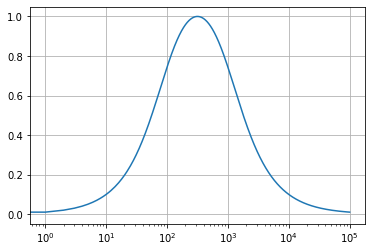

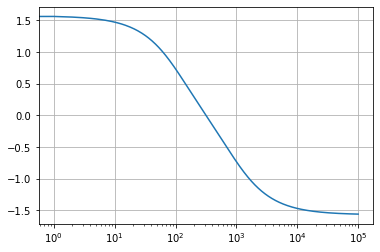

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 10**(-3)
R = 1
C = 10**(-2)

w = np.linspace(0,100000,100000)
H = (1j*w)/(-L/R*w**2+1j*w+1/(R*C))
plt.plot(w,np.abs(H))
plt.xscale('log')
plt.grid()
plt.show()
plt.plot(w,np.angle(H))
plt.xscale('log')
plt.grid()

In [3]:
w = 10**3
H = (1j*w)/(-L/R*w**2+1j*w+1/(R*C))
np.abs(H), np.angle(H)

(0.7432941462471664, -0.7328151017865066)

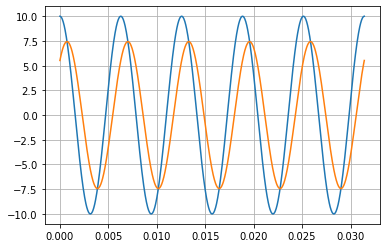

In [6]:
T = 2*np.pi/w
t = np.linspace(0,5*T,1000)
U_i = 10*np.exp(1j*w*t)
U_o = H*U_i
plt.plot(t,U_i.real) 
plt.plot(t,U_o.real) 
plt.grid()

### Exercise 2
---

Consider a simple math-spring-system (mass $m$, spring constant $k$, coefficient of friction $\gamma$), which is excited by an external force $F(t)$ (see for example: https://www.av.ph.tum.de/Experiment/1000/Animation/1605/resonanz.php) 
- Use Newtons second law (principle of action) 
$$
F(t) = m\ddot{x}(t)
$$
to determine the equation of motion.
- Determine the complex transfer function $H(\omega)$.
- Plot $|H(\omega)|$ and $\varphi(\omega)$ in two different plots for a few values of $\gamma$.

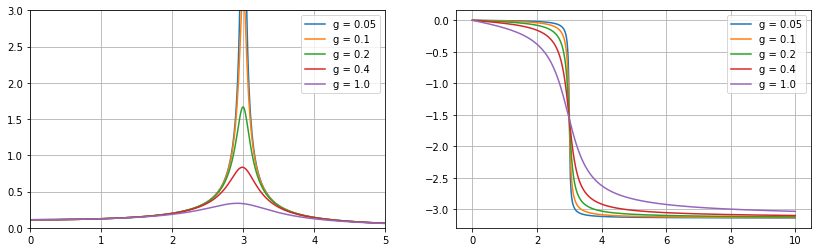

In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

################
# Your code here
################
m = 1 # Masse
D = 9 # Federkonstante
g = [0.05,0.1,0.2,0.4,1.0]

w_0 = np.sqrt(D/m)
w = np.linspace(0,10,1000)
plt.figure(figsize=(14,4))
for g in g:
    H = 1/(-w**2+1j*g/m*w+w_0**2)
    plt.subplot(1,2,1)
    plt.plot(w,np.abs(H),label='g = {}'.format(g))
    plt.subplot(1,2,2)
    plt.plot(w,np.angle(H),label='g = {}'.format(g))

plt.subplot(1,2,1)
plt.grid()
plt.legend()
plt.axis([0,5,0,3])
plt.subplot(1,2,2)
plt.grid()
plt.legend()